# Natural Language Processing

- Introduction of NLP
- Understanding NLP based python libraries and its installation
    - nltk
    - spacy
- Text data wrangling using "re" without using any NLP libraries, to understand what actaully happens in the background 
  when libs are used
    - Remove unwanted characters
    - Remove numbers, spaces
- Creating document (aka: list of sentences)
- Creating paragraphs/sentence tokens from large text
- Creating word tokens
- Getting frequency distribution of each word and visualize them, 
    - see the impact of followings: 
        - Without making text as lowercase
        - After making text as lowercase
- Compare Number of stop words between NLTK-->SPACY-->SKLEARN and select the best one
- Finding Stop words and removing them again visualize the frequency distribution

In [1]:
import nltk as nl
import re
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords #stopwords.words("english")
from spacy.lang.en.stop_words import STOP_WORDS # list of stopwords
from sklearn.feature_extraction import stop_words #stop_words.ENGLISH_STOP_WORD
# For FreqDistribution: nl.FreqDist(<list of words>)

In [6]:
nl.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [54]:
doc = """Barack Hussein Obama II (/bəˈrɑːk huːˈseɪn oʊˈbɑːmə/ (About this soundlisten);[1] born August 4, 1961) is an American attorney and politician who served as the 44th president of the United States from 2009 to 2017. A member of the Democratic Party, he was the first African-American president of the United States. He previously served as a U.S. senator from Illinois from 2005 to 2008 and an Illinois state senator from 1997 to 2004.

Obama was born in Honolulu, Hawaii. After graduating from Columbia University in 1983, he worked as a community organizer in Chicago. In 1988, he enrolled in Harvard Law School, where he was the first black president of the Harvard Law Review. After graduating, he became a civil rights attorney and an academic, teaching constitutional law at the University of Chicago Law School from 1992 to 2004. He represented the 13th district for three terms in the Illinois Senate from 1997 until 2004, when he ran for the U.S. Senate. He received national attention in 2004 with his March primary win, his well-received July Democratic National Convention keynote address, and his landslide November election to the Senate. In 2008, he was nominated for president a year after his campaign began, after a close primary campaign against Hillary Clinton. He was elected over Republican John McCain and was inaugurated on January 20, 2009. Nine months later, he was named the 2009 Nobel Peace Prize laureate.

Regarded as a centrist New Democrat, Obama signed many landmark bills into law during his first two years in office. The main reforms that were passed include the Patient Protection and Affordable Care Act (commonly referred to as the "Affordable Care Act" or "Obamacare"), the Dodd–Frank Wall Street Reform and Consumer Protection Act, and the Don't Ask, Don't Tell Repeal Act of 2010. The American Recovery and Reinvestment Act of 2009 and Tax Relief, Unemployment Insurance Reauthorization, and Job Creation Act of 2010 served as economic stimulus amidst the Great Recession. After a lengthy debate over the national debt limit, he signed the Budget Control and the American Taxpayer Relief Acts. In foreign policy, he increased U.S. troop levels in Afghanistan, reduced nuclear weapons with the United States–Russia New START treaty, and ended military involvement in the Iraq War. He ordered military involvement in Libya, contributing to the overthrow of Muammar Gaddafi. He also ordered the military operations that resulted in the deaths of Osama bin Laden and suspected Yemeni Al-Qaeda operative Anwar al-Awlaki."""

##### Text data wrangling using "re" without using any NLP libraries, to understand what actaully happens in the background when libs are used

##### Remove unwanted characters

In [55]:
doc1 = re.sub("[^a-zA-Z]+"," ",doc)
doc1

'Barack Hussein Obama II b r k hu se n o b m About this soundlisten born August is an American attorney and politician who served as the th president of the United States from to A member of the Democratic Party he was the first African American president of the United States He previously served as a U S senator from Illinois from to and an Illinois state senator from to Obama was born in Honolulu Hawaii After graduating from Columbia University in he worked as a community organizer in Chicago In he enrolled in Harvard Law School where he was the first black president of the Harvard Law Review After graduating he became a civil rights attorney and an academic teaching constitutional law at the University of Chicago Law School from to He represented the th district for three terms in the Illinois Senate from until when he ran for the U S Senate He received national attention in with his March primary win his well received July Democratic National Convention keynote address and his land

##### Remove numbers, spaces

In [38]:
doc2 = re.sub("\s+"," ",doc1)
doc2

'Barack Hussein Obama II b r k hu se n o b m About this soundlisten born August is an American attorney and politician who served as the th president of the United States from to A member of the Democratic Party he was the first African American president of the United States He previously served as a U S senator from Illinois from to and an Illinois state senator from to Obama was born in Honolulu Hawaii After graduating from Columbia University in he worked as a community organizer in Chicago In he enrolled in Harvard Law School where he was the first black president of the Harvard Law Review After graduating he became a civil rights attorney and an academic teaching constitutional law at the University of Chicago Law School from to He represented the th district for three terms in the Illinois Senate from until when he ran for the U S Senate He received national attention in with his March primary win his well received July Democratic National Convention keynote address and his land

##### Creating document (aka: list of sentences)

##### Creating paragraphs/sentence tokens from large text

In [39]:
doc = """Barack Hussein Obama II (/bəˈrɑːk huːˈseɪn oʊˈbɑːmə/ (About this soundlisten);[1] born August 4, 1961) is an American attorney and politician who served as the 44th president of the United States from 2009 to 2017. A member of the Democratic Party, he was the first African-American president of the United States. He previously served as a U.S. senator from Illinois from 2005 to 2008 and an Illinois state senator from 1997 to 2004.

Obama was born in Honolulu, Hawaii. After graduating from Columbia University in 1983, he worked as a community organizer in Chicago. In 1988, he enrolled in Harvard Law School, where he was the first black president of the Harvard Law Review. After graduating, he became a civil rights attorney and an academic, teaching constitutional law at the University of Chicago Law School from 1992 to 2004. He represented the 13th district for three terms in the Illinois Senate from 1997 until 2004, when he ran for the U.S. Senate. He received national attention in 2004 with his March primary win, his well-received July Democratic National Convention keynote address, and his landslide November election to the Senate. In 2008, he was nominated for president a year after his campaign began, after a close primary campaign against Hillary Clinton. He was elected over Republican John McCain and was inaugurated on January 20, 2009. Nine months later, he was named the 2009 Nobel Peace Prize laureate.

Regarded as a centrist New Democrat, Obama signed many landmark bills into law during his first two years in office. The main reforms that were passed include the Patient Protection and Affordable Care Act (commonly referred to as the "Affordable Care Act" or "Obamacare"), the Dodd–Frank Wall Street Reform and Consumer Protection Act, and the Don't Ask, Don't Tell Repeal Act of 2010. The American Recovery and Reinvestment Act of 2009 and Tax Relief, Unemployment Insurance Reauthorization, and Job Creation Act of 2010 served as economic stimulus amidst the Great Recession. After a lengthy debate over the national debt limit, he signed the Budget Control and the American Taxpayer Relief Acts. In foreign policy, he increased U.S. troop levels in Afghanistan, reduced nuclear weapons with the United States–Russia New START treaty, and ended military involvement in the Iraq War. He ordered military involvement in Libya, contributing to the overthrow of Muammar Gaddafi. He also ordered the military operations that resulted in the deaths of Osama bin Laden and suspected Yemeni Al-Qaeda operative Anwar al-Awlaki."""

In [40]:
doc.split("\n")

['Barack Hussein Obama II (/bəˈrɑːk huːˈseɪn oʊˈbɑːmə/ (About this soundlisten);[1] born August 4, 1961) is an American attorney and politician who served as the 44th president of the United States from 2009 to 2017. A member of the Democratic Party, he was the first African-American president of the United States. He previously served as a U.S. senator from Illinois from 2005 to 2008 and an Illinois state senator from 1997 to 2004.',
 '',
 'Obama was born in Honolulu, Hawaii. After graduating from Columbia University in 1983, he worked as a community organizer in Chicago. In 1988, he enrolled in Harvard Law School, where he was the first black president of the Harvard Law Review. After graduating, he became a civil rights attorney and an academic, teaching constitutional law at the University of Chicago Law School from 1992 to 2004. He represented the 13th district for three terms in the Illinois Senate from 1997 until 2004, when he ran for the U.S. Senate. He received national attent

In [41]:
len(doc.split("\n"))

5

In [42]:
doc1 = doc.split("\n")
doc2 = [sent for sent in doc1 if sent != ""]

In [43]:
len(doc2)

3

##### Creating word tokens

In [44]:
doc2

['Barack Hussein Obama II (/bəˈrɑːk huːˈseɪn oʊˈbɑːmə/ (About this soundlisten);[1] born August 4, 1961) is an American attorney and politician who served as the 44th president of the United States from 2009 to 2017. A member of the Democratic Party, he was the first African-American president of the United States. He previously served as a U.S. senator from Illinois from 2005 to 2008 and an Illinois state senator from 1997 to 2004.',
 'Obama was born in Honolulu, Hawaii. After graduating from Columbia University in 1983, he worked as a community organizer in Chicago. In 1988, he enrolled in Harvard Law School, where he was the first black president of the Harvard Law Review. After graduating, he became a civil rights attorney and an academic, teaching constitutional law at the University of Chicago Law School from 1992 to 2004. He represented the 13th district for three terms in the Illinois Senate from 1997 until 2004, when he ran for the U.S. Senate. He received national attention i

In [56]:
doc = """Barack Hussein Obama II (/bəˈrɑːk huːˈseɪn oʊˈbɑːmə/ (About this soundlisten);[1] born August 4, 1961) is an American attorney and politician who served as the 44th president of the United States from 2009 to 2017. A member of the Democratic Party, he was the first African-American president of the United States. He previously served as a U.S. senator from Illinois from 2005 to 2008 and an Illinois state senator from 1997 to 2004.

Obama was born in Honolulu, Hawaii. After graduating from Columbia University in 1983, he worked as a community organizer in Chicago. In 1988, he enrolled in Harvard Law School, where he was the first black president of the Harvard Law Review. After graduating, he became a civil rights attorney and an academic, teaching constitutional law at the University of Chicago Law School from 1992 to 2004. He represented the 13th district for three terms in the Illinois Senate from 1997 until 2004, when he ran for the U.S. Senate. He received national attention in 2004 with his March primary win, his well-received July Democratic National Convention keynote address, and his landslide November election to the Senate. In 2008, he was nominated for president a year after his campaign began, after a close primary campaign against Hillary Clinton. He was elected over Republican John McCain and was inaugurated on January 20, 2009. Nine months later, he was named the 2009 Nobel Peace Prize laureate.

Regarded as a centrist New Democrat, Obama signed many landmark bills into law during his first two years in office. The main reforms that were passed include the Patient Protection and Affordable Care Act (commonly referred to as the "Affordable Care Act" or "Obamacare"), the Dodd–Frank Wall Street Reform and Consumer Protection Act, and the Don't Ask, Don't Tell Repeal Act of 2010. The American Recovery and Reinvestment Act of 2009 and Tax Relief, Unemployment Insurance Reauthorization, and Job Creation Act of 2010 served as economic stimulus amidst the Great Recession. After a lengthy debate over the national debt limit, he signed the Budget Control and the American Taxpayer Relief Acts. In foreign policy, he increased U.S. troop levels in Afghanistan, reduced nuclear weapons with the United States–Russia New START treaty, and ended military involvement in the Iraq War. He ordered military involvement in Libya, contributing to the overthrow of Muammar Gaddafi. He also ordered the military operations that resulted in the deaths of Osama bin Laden and suspected Yemeni Al-Qaeda operative Anwar al-Awlaki."""

In [59]:
doc3 = doc.split("\n")
doc4 = [para for para in doc3 if para !=""]
doc4

['Barack Hussein Obama II (/bəˈrɑːk huːˈseɪn oʊˈbɑːmə/ (About this soundlisten);[1] born August 4, 1961) is an American attorney and politician who served as the 44th president of the United States from 2009 to 2017. A member of the Democratic Party, he was the first African-American president of the United States. He previously served as a U.S. senator from Illinois from 2005 to 2008 and an Illinois state senator from 1997 to 2004.',
 'Obama was born in Honolulu, Hawaii. After graduating from Columbia University in 1983, he worked as a community organizer in Chicago. In 1988, he enrolled in Harvard Law School, where he was the first black president of the Harvard Law Review. After graduating, he became a civil rights attorney and an academic, teaching constitutional law at the University of Chicago Law School from 1992 to 2004. He represented the 13th district for three terms in the Illinois Senate from 1997 until 2004, when he ran for the U.S. Senate. He received national attention i

In [64]:
doc5 = doc4[0]

In [66]:
los = [s1 for s1 in doc5.split(".") if len(s1)>5]
los

['Barack Hussein Obama II (/bəˈrɑːk huːˈseɪn oʊˈbɑːmə/ (About this soundlisten);[1] born August 4, 1961) is an American attorney and politician who served as the 44th president of the United States from 2009 to 2017',
 ' A member of the Democratic Party, he was the first African-American president of the United States',
 ' He previously served as a U',
 ' senator from Illinois from 2005 to 2008 and an Illinois state senator from 1997 to 2004']

In [67]:
sent = los[-1]
sent

' senator from Illinois from 2005 to 2008 and an Illinois state senator from 1997 to 2004'

In [69]:
low = [wd for wd in sent.split(" ") if len(wd)>0]
low

['senator',
 'from',
 'Illinois',
 'from',
 '2005',
 'to',
 '2008',
 'and',
 'an',
 'Illinois',
 'state',
 'senator',
 'from',
 '1997',
 'to',
 '2004']

##### Getting frequency distribution of each word and visualize them,

In [70]:
d1 = """In late August 1961, a few weeks after he was born, Barack and his mother moved to the University of Washington in Seattle, where they lived for a year. During that time, the elder Obama completed his undergraduate degree in economics in Hawaii, graduating in June 1962. He left to attend graduate school on a scholarship at Harvard University, where he earned an M.A. in economics. Obama's parents divorced in March 1964.[22] Obama Sr. returned to Kenya in 1964, where he married for a third time and worked for the Kenyan government as the Senior Economic Analyst in the Ministry of Finance.[23] He visited his son in Hawaii only once, at Christmas 1971,[24] before he was killed in an automobile accident in 1982, when Obama was 21 years old.[25] Recalling his early childhood, Obama said, "That my father looked nothing like the people around me—that he was black as pitch, my mother white as milk—barely registered in my mind."[19] He described his struggles as a young adult to reconcile social perceptions of his multiracial heritage."""

In [71]:
d1

'In late August 1961, a few weeks after he was born, Barack and his mother moved to the University of Washington in Seattle, where they lived for a year. During that time, the elder Obama completed his undergraduate degree in economics in Hawaii, graduating in June 1962. He left to attend graduate school on a scholarship at Harvard University, where he earned an M.A. in economics. Obama\'s parents divorced in March 1964.[22] Obama Sr. returned to Kenya in 1964, where he married for a third time and worked for the Kenyan government as the Senior Economic Analyst in the Ministry of Finance.[23] He visited his son in Hawaii only once, at Christmas 1971,[24] before he was killed in an automobile accident in 1982, when Obama was 21 years old.[25] Recalling his early childhood, Obama said, "That my father looked nothing like the people around me—that he was black as pitch, my mother white as milk—barely registered in my mind."[19] He described his struggles as a young adult to reconcile soci

In [74]:
dow = {wd:d1.count(wd) for wd in d1.split(" ")}
print(dow)

{'In': 1, 'late': 1, 'August': 1, '1961,': 1, 'a': 77, 'few': 1, 'weeks': 1, 'after': 1, 'he': 20, 'was': 4, 'born,': 1, 'Barack': 1, 'and': 2, 'his': 6, 'mother': 2, 'moved': 1, 'to': 6, 'the': 10, 'University': 2, 'of': 3, 'Washington': 1, 'in': 20, 'Seattle,': 1, 'where': 3, 'they': 1, 'lived': 1, 'for': 4, 'year.': 1, 'During': 1, 'that': 2, 'time,': 1, 'elder': 1, 'Obama': 5, 'completed': 1, 'undergraduate': 1, 'degree': 1, 'economics': 2, 'Hawaii,': 1, 'graduating': 1, 'June': 1, '1962.': 1, 'He': 3, 'left': 1, 'attend': 1, 'graduate': 2, 'school': 1, 'on': 10, 'scholarship': 1, 'at': 12, 'Harvard': 1, 'University,': 1, 'earned': 1, 'an': 6, 'M.A.': 1, 'economics.': 1, "Obama's": 1, 'parents': 1, 'divorced': 1, 'March': 1, '1964.[22]': 1, 'Sr.': 1, 'returned': 1, 'Kenya': 2, '1964,': 1, 'married': 1, 'third': 1, 'time': 2, 'worked': 1, 'Kenyan': 1, 'government': 1, 'as': 10, 'Senior': 1, 'Economic': 1, 'Analyst': 1, 'Ministry': 1, 'Finance.[23]': 1, 'visited': 1, 'son': 1, 'Hawai

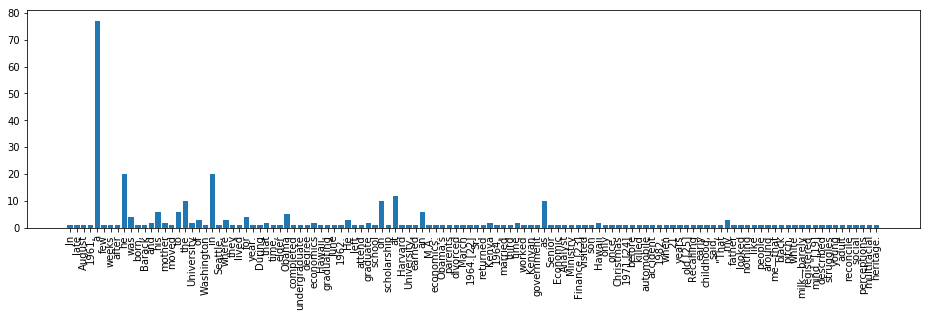

In [77]:
plt.figure(figsize=(16,4))
plt.bar(dow.keys(),dow.values())
plt.xticks(rotation=90)
plt.show()

##### see the impact of followings:
- Without making text as lowercase
- After making text as lowercase

In [104]:
new = d1.lower()
print(len(low))
dow = {wd:new.count(wd) for wd in new.split(" ")}
print(dow)

175
{'in': 21, 'late': 1, 'august': 1, '1961,': 1, 'a': 80, 'few': 1, 'weeks': 1, 'after': 1, 'he': 23, 'was': 5, 'born,': 1, 'barack': 1, 'and': 2, 'his': 6, 'mother': 2, 'moved': 1, 'to': 6, 'the': 10, 'university': 2, 'of': 3, 'washington': 1, 'seattle,': 1, 'where': 3, 'they': 1, 'lived': 1, 'for': 4, 'year.': 1, 'during': 1, 'that': 3, 'time,': 1, 'elder': 1, 'obama': 5, 'completed': 1, 'undergraduate': 1, 'degree': 1, 'economics': 2, 'hawaii,': 1, 'graduating': 1, 'june': 1, '1962.': 1, 'left': 1, 'attend': 1, 'graduate': 2, 'school': 1, 'on': 10, 'scholarship': 1, 'at': 12, 'harvard': 1, 'university,': 1, 'earned': 1, 'an': 7, 'm.a.': 1, 'economics.': 1, "obama's": 1, 'parents': 1, 'divorced': 1, 'march': 1, '1964.[22]': 1, 'sr.': 1, 'returned': 1, 'kenya': 2, '1964,': 1, 'married': 1, 'third': 1, 'time': 2, 'worked': 1, 'kenyan': 1, 'government': 1, 'as': 10, 'senior': 1, 'economic': 3, 'analyst': 1, 'ministry': 1, 'finance.[23]': 1, 'visited': 1, 'son': 1, 'hawaii': 2, 'only':

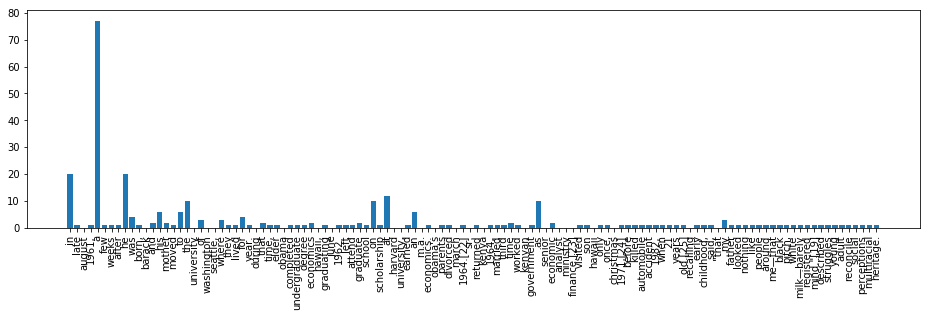

In [79]:
plt.figure(figsize=(16,4))
plt.bar(dow.keys(),dow.values())
plt.xticks(rotation=90)
plt.show()

##### Compare Number of stop words between NLTK-->SPACY-->SKLEARN and select the best one

In [90]:
print("nltk stop words",len(stopwords.words("english")))
print("spacy stop words",len(STOP_WORDS))
print("sklearn stop words",len(stop_words.ENGLISH_STOP_WORDS))

nltk stop words 179
spacy stop words 326
sklearn stop words 318


In [91]:
d1

'In late August 1961, a few weeks after he was born, Barack and his mother moved to the University of Washington in Seattle, where they lived for a year. During that time, the elder Obama completed his undergraduate degree in economics in Hawaii, graduating in June 1962. He left to attend graduate school on a scholarship at Harvard University, where he earned an M.A. in economics. Obama\'s parents divorced in March 1964.[22] Obama Sr. returned to Kenya in 1964, where he married for a third time and worked for the Kenyan government as the Senior Economic Analyst in the Ministry of Finance.[23] He visited his son in Hawaii only once, at Christmas 1971,[24] before he was killed in an automobile accident in 1982, when Obama was 21 years old.[25] Recalling his early childhood, Obama said, "That my father looked nothing like the people around me—that he was black as pitch, my mother white as milk—barely registered in my mind."[19] He described his struggles as a young adult to reconcile soci

In [98]:
# STOP_WORDS

In [100]:
low = d1.lower().split(" ")
# print(low)
word = [wd for wd in low if wd not in STOP_WORDS]
print(word)

['late', 'august', '1961,', 'weeks', 'born,', 'barack', 'mother', 'moved', 'university', 'washington', 'seattle,', 'lived', 'year.', 'time,', 'elder', 'obama', 'completed', 'undergraduate', 'degree', 'economics', 'hawaii,', 'graduating', 'june', '1962.', 'left', 'attend', 'graduate', 'school', 'scholarship', 'harvard', 'university,', 'earned', 'm.a.', 'economics.', "obama's", 'parents', 'divorced', 'march', '1964.[22]', 'obama', 'sr.', 'returned', 'kenya', '1964,', 'married', 'time', 'worked', 'kenyan', 'government', 'senior', 'economic', 'analyst', 'ministry', 'finance.[23]', 'visited', 'son', 'hawaii', 'once,', 'christmas', '1971,[24]', 'killed', 'automobile', 'accident', '1982,', 'obama', '21', 'years', 'old.[25]', 'recalling', 'early', 'childhood,', 'obama', 'said,', '"that', 'father', 'looked', 'like', 'people', 'me—that', 'black', 'pitch,', 'mother', 'white', 'milk—barely', 'registered', 'mind."[19]', 'described', 'struggles', 'young', 'adult', 'reconcile', 'social', 'perceptions

##### Finding Stop words and removing them again visualize the frequency distribution

In [107]:
new = " ".join(word)
dow = {wd:new.count(wd) for wd in new.split(" ")}
print(len(dow))
print(dow)

91
{'late': 1, 'august': 1, '1961,': 1, 'weeks': 1, 'born,': 1, 'barack': 1, 'mother': 2, 'moved': 1, 'university': 2, 'washington': 1, 'seattle,': 1, 'lived': 1, 'year.': 1, 'time,': 1, 'elder': 1, 'obama': 5, 'completed': 1, 'undergraduate': 1, 'degree': 1, 'economics': 2, 'hawaii,': 1, 'graduating': 1, 'june': 1, '1962.': 1, 'left': 1, 'attend': 1, 'graduate': 2, 'school': 1, 'scholarship': 1, 'harvard': 1, 'university,': 1, 'earned': 1, 'm.a.': 1, 'economics.': 1, "obama's": 1, 'parents': 1, 'divorced': 1, 'march': 1, '1964.[22]': 1, 'sr.': 1, 'returned': 1, 'kenya': 2, '1964,': 1, 'married': 1, 'time': 2, 'worked': 1, 'kenyan': 1, 'government': 1, 'senior': 1, 'economic': 3, 'analyst': 1, 'ministry': 1, 'finance.[23]': 1, 'visited': 1, 'son': 1, 'hawaii': 2, 'once,': 1, 'christmas': 1, '1971,[24]': 1, 'killed': 1, 'automobile': 1, 'accident': 1, '1982,': 1, '21': 1, 'years': 1, 'old.[25]': 1, 'recalling': 1, 'early': 1, 'childhood,': 1, 'said,': 1, '"that': 1, 'father': 1, 'looked

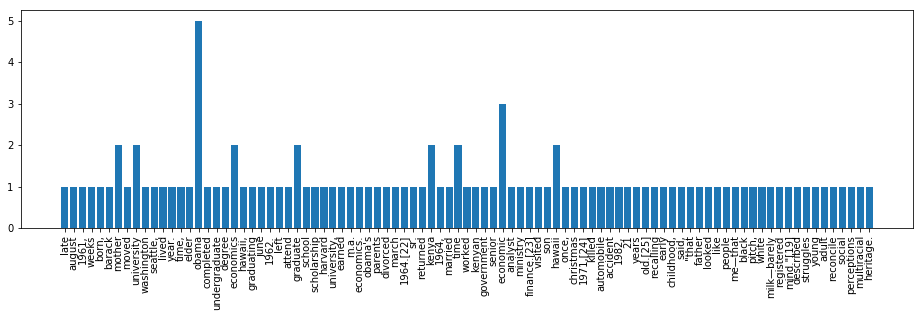

In [103]:
plt.figure(figsize=(16,4))
plt.bar(dow.keys(),dow.values())
plt.xticks(rotation=90)
plt.show()